In [1]:
#MM 749: Regrassion_and_hypothesis
# Aditya sharma 22m1843

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the csv file using the appropriate encoding
df = pd.read_csv('Aditya_Sharma_22m1843_data.csv', encoding='latin-1')

# Print the dataframe
print(df)

      energy_above_hull (meV/atom)  Number of elements  \
0                        29.747707                   4   
1                       106.702335                   5   
2                       171.608093                   4   
3                       284.898190                   5   
4                       270.007913                   4   
...                            ...                 ...   
1924                      1.588513                   4   
1925                      0.000000                   4   
1926                      0.000000                   4   
1927                      0.000000                   4   
1928                      0.000000                   3   

      formation_energy (eV/atom)  GSenergy_pa_AB_avg  \
0                      -2.113335           -5.326081   
1                      -1.311863           -5.470804   
2                      -1.435607           -5.113806   
3                      -0.868639           -4.308582   
4                      

In [3]:
df.shape

(1929, 8)

In [4]:
df.head()

,energy_above_hull (meV/atom),Number of elements,formation_energy (eV/atom),GSenergy_pa_AB_avg,thermal conductivity_AB_avg,Asite_BCCenergy_pa_max,Asite_Atomic Radius ()_max,Asite_Atomic Volume (cm?/mol)_max
0,29.747707,4,-2.113335,-5.326081,18.044375,-1.677940,2.22,39.24
1,106.702335,5,-1.311863,-5.470804,56.408750,-1.923522,2.22,39.24
2,171.608093,4,-1.435607,-5.113806,117.400000,-1.923522,2.22,39.24
3,284.898190,5,-0.868639,-4.308582,62.875000,-0.740339,2.22,39.24
4,270.007913,4,-1.746806,-6.108765,46.412500,-1.923522,2.22,39.24


In [5]:
corr=df.corr()
corr

,energy_above_hull (meV/atom),Number of elements,formation_energy (eV/atom),GSenergy_pa_AB_avg,thermal conductivity_AB_avg,Asite_BCCenergy_pa_max,Asite_Atomic Radius ()_max,Asite_Atomic Volume (cm?/mol)_max
energy_above_hull (meV/atom),1.000000,0.385618,0.692898,0.473988,0.445189,0.475000,0.409994,0.414063
Number of elements,0.385618,1.000000,0.371040,0.206840,0.193670,0.473676,0.383830,0.381445
formation_energy (eV/atom),0.692898,0.371040,1.000000,0.539706,0.577291,0.561754,0.500111,0.495776
GSenergy_pa_AB_avg,0.473988,0.206840,0.539706,1.000000,0.359657,0.481984,0.495205,0.478197
thermal conductivity_AB_avg,0.445189,0.193670,0.577291,0.359657,1.000000,0.260129,0.093695,0.087310
Asite_BCCenergy_pa_max,0.475000,0.473676,0.561754,0.481984,0.260129,1.000000,0.778270,0.751819
Asite_Atomic Radius ()_max,0.409994,0.383830,0.500111,0.495205,0.093695,0.778270,1.000000,0.991502
Asite_Atomic Volume (cm?/mol)_max,0.414063,0.381445,0.495776,0.478197,0.087310,0.751819,0.991502,1.000000


In [6]:
parameters = ['energy_above_hull (meV/atom)', 'Number of elements',
       'formation_energy (eV/atom)', 'GSenergy_pa_AB_avg',
       'thermal conductivity_AB_avg', 'Asite_BCCenergy_pa_max', 'Asite_Atomic Radius ()_max',
       'Asite_Atomic Volume (cm?/mol)_max']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


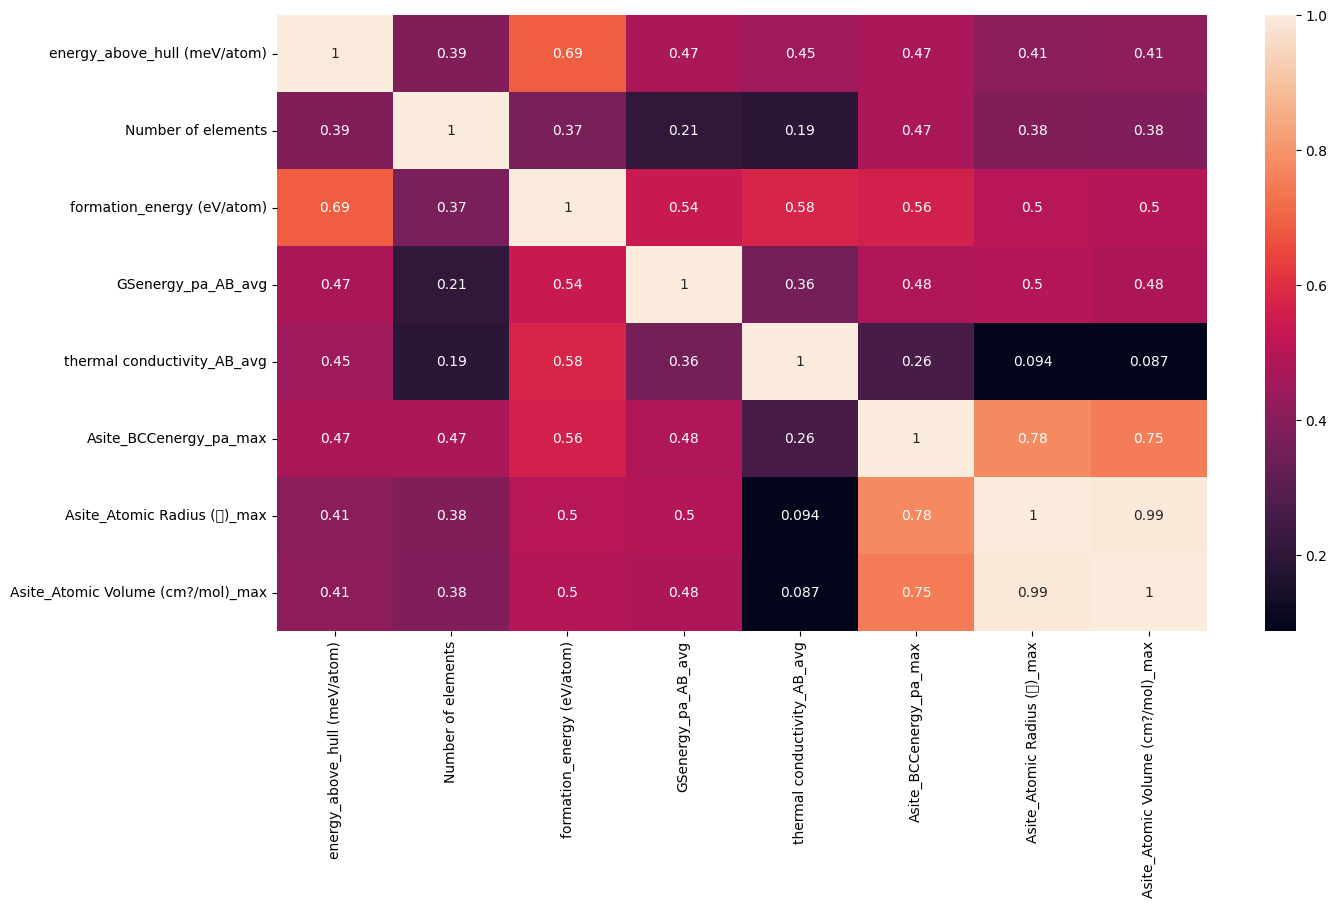

In [7]:
plt.figure(figsize=(15,8))
corr_mat = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression


In [9]:
lr=LinearRegression()

In [10]:
df.columns

Index(['energy_above_hull (meV/atom)', 'Number of elements',
       'formation_energy (eV/atom)', 'GSenergy_pa_AB_avg',
       'thermal conductivity_AB_avg', 'Asite_BCCenergy_pa_max',
       'Asite_Atomic Radius ()_max', 'Asite_Atomic Volume (cm?/mol)_max'],
      dtype='object')

y=334.39+119.54x


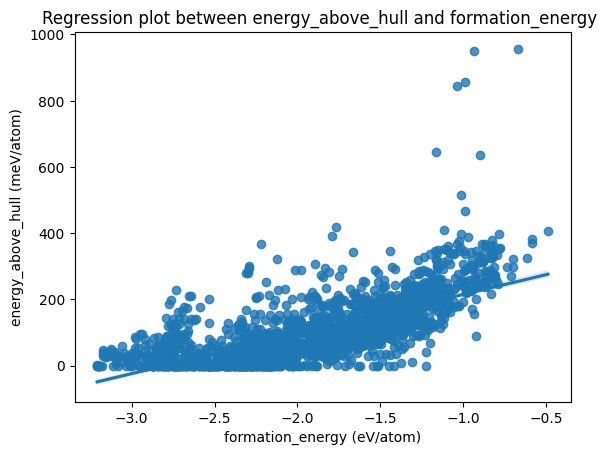

In [11]:
plt.title('Regression plot between energy_above_hull and formation_energy ')
lr.fit(df['formation_energy (eV/atom)'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='formation_energy (eV/atom)', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

y=-198.17+70.89x


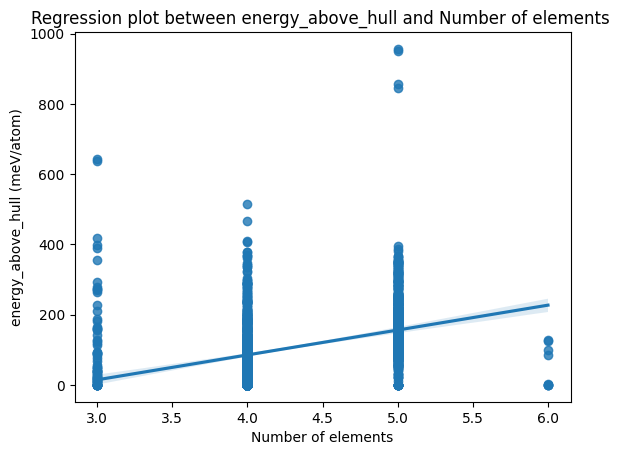

In [12]:
plt.title('Regression plot between energy_above_hull and Number of elements ')
lr.fit(df['Number of elements'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='Number of elements', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

y=363.37+46.15x


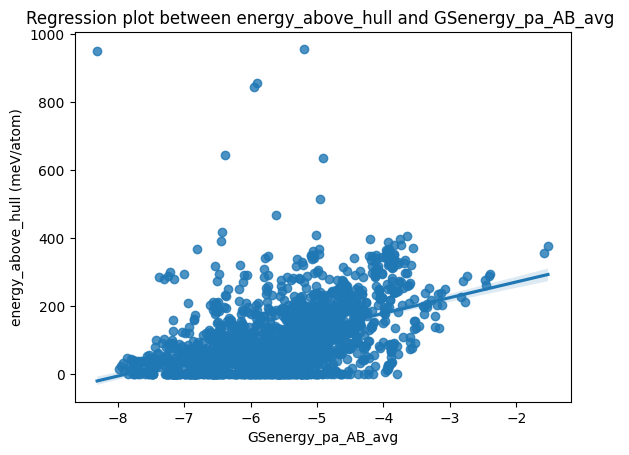

In [13]:
plt.title('Regression plot between energy_above_hull and GSenergy_pa_AB_avg ')
lr.fit(df['GSenergy_pa_AB_avg'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='GSenergy_pa_AB_avg', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

y=28.78+1.65x


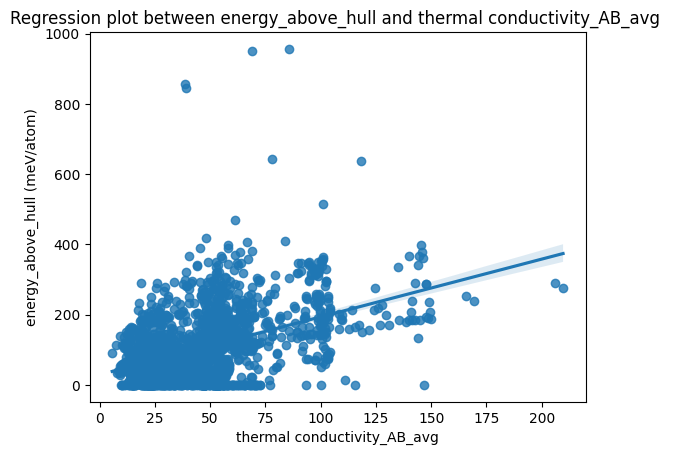

In [14]:
plt.title('Regression plot between energy_above_hull and thermal conductivity_AB_avg ')
lr.fit(df['thermal conductivity_AB_avg'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='thermal conductivity_AB_avg', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

y=188.54+28.46x


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


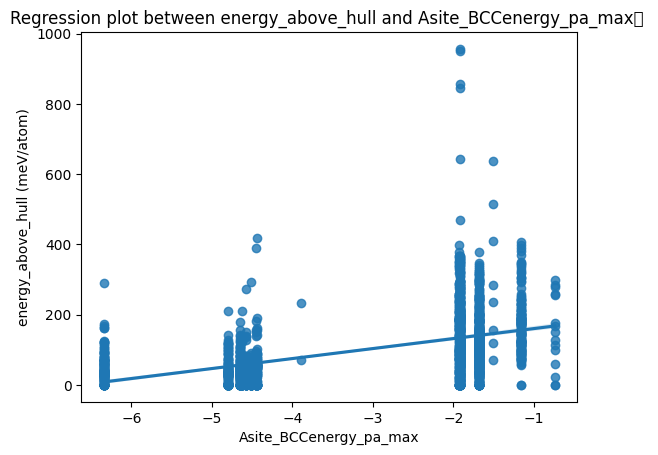

In [15]:
plt.title('Regression plot between energy_above_hull and Asite_BCCenergy_pa_max	 ')
lr.fit(df['Asite_BCCenergy_pa_max'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='Asite_BCCenergy_pa_max', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

y=-366.80+233.08x


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 143 (\x8f) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


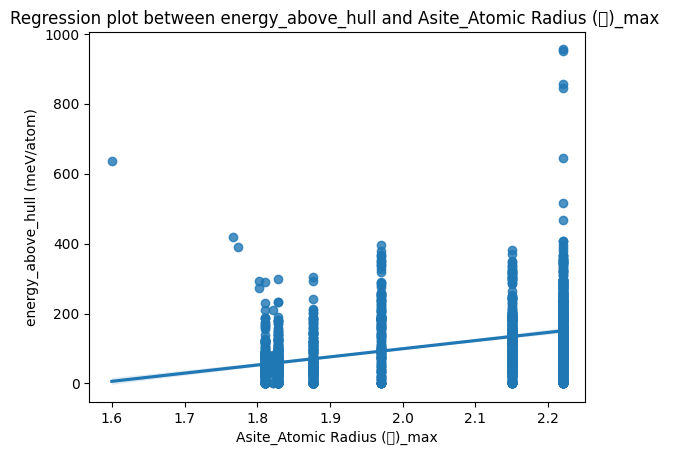

In [16]:
plt.title('Regression plot between energy_above_hull and Asite_Atomic Radius ()_max ')
lr.fit(df['Asite_Atomic Radius ()_max'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='Asite_Atomic Radius ()_max', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

y=-38.86+4.94x


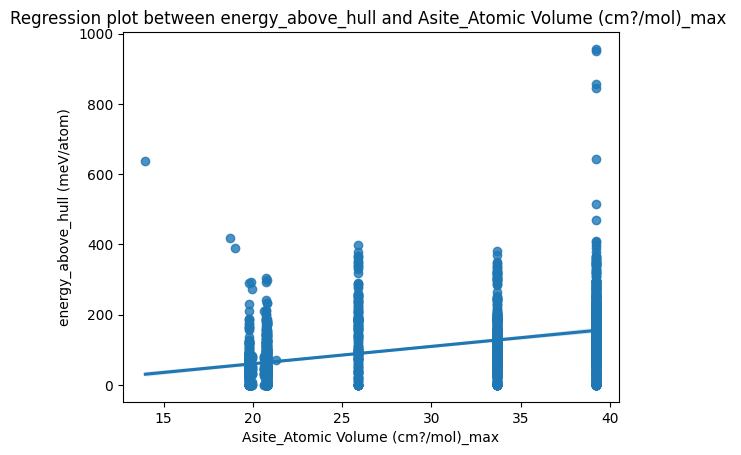

In [17]:
plt.title('Regression plot between energy_above_hull and Asite_Atomic Volume (cm?/mol)_max ')
lr.fit(df['Asite_Atomic Volume (cm?/mol)_max'].values.reshape(-1, 1),df['energy_above_hull (meV/atom)'].values.reshape(-1, 1))
sns.regplot(x='Asite_Atomic Volume (cm?/mol)_max', y='energy_above_hull (meV/atom)', data=df)
print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 143 (\x8f) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 143 (\x8f) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


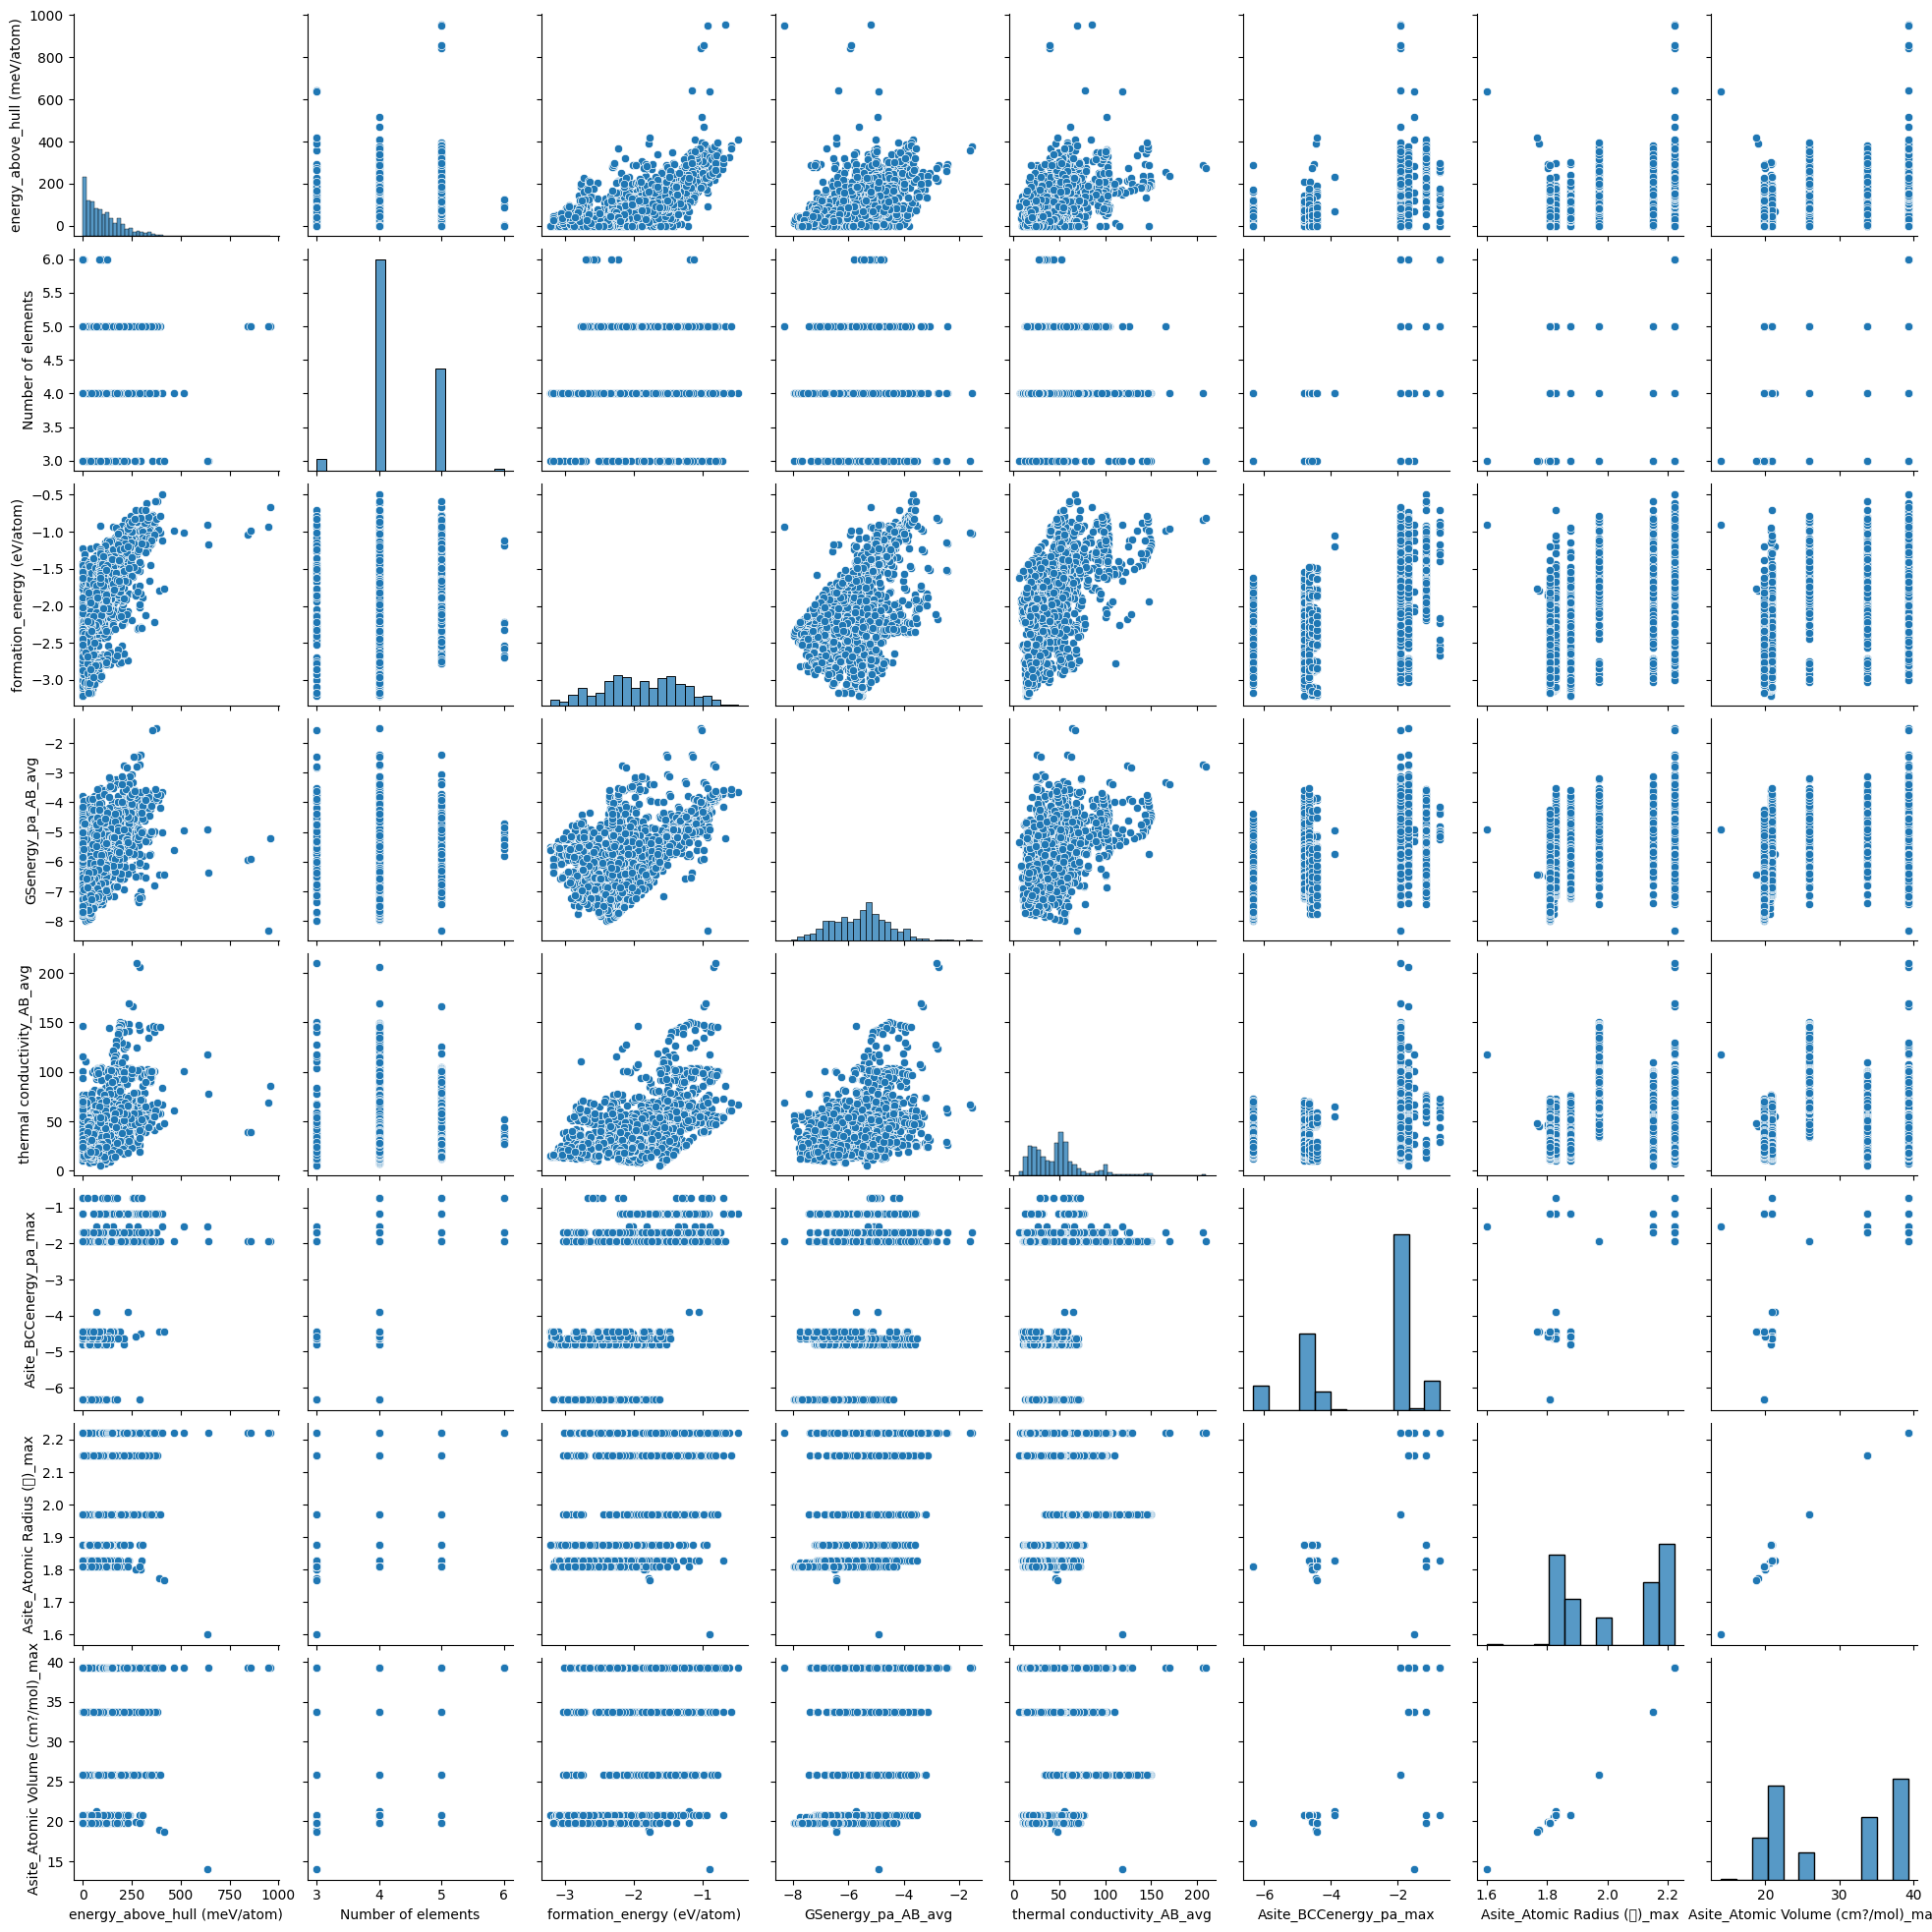

In [18]:
sns.pairplot(df)

In [19]:
import scipy.stats as stats

In [20]:
df.head()

,energy_above_hull (meV/atom),Number of elements,formation_energy (eV/atom),GSenergy_pa_AB_avg,thermal conductivity_AB_avg,Asite_BCCenergy_pa_max,Asite_Atomic Radius ()_max,Asite_Atomic Volume (cm?/mol)_max
0,29.747707,4,-2.113335,-5.326081,18.044375,-1.677940,2.22,39.24
1,106.702335,5,-1.311863,-5.470804,56.408750,-1.923522,2.22,39.24
2,171.608093,4,-1.435607,-5.113806,117.400000,-1.923522,2.22,39.24
3,284.898190,5,-0.868639,-4.308582,62.875000,-0.740339,2.22,39.24
4,270.007913,4,-1.746806,-6.108765,46.412500,-1.923522,2.22,39.24


In [21]:
y=df['energy_above_hull (meV/atom)']

In [22]:
x=df.iloc[:,1:]

In [23]:
import statsmodels.api as sm



# add a constant term to the features
X = sm.add_constant(x)

# fit the multiple linear regression model using OLS
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     energy_above_hull (meV/atom)   R-squared:                       0.524
Model:                                      OLS   Adj. R-squared:                  0.522
Method:                           Least Squares   F-statistic:                     302.0
Date:                          Mon, 24 Apr 2023   Prob (F-statistic):          4.52e-304
Time:                                  23:29:50   Log-Likelihood:                -10873.
No. Observations:                          1929   AIC:                         2.176e+04
Df Residuals:                              1921   BIC:                         2.181e+04
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------

In [24]:
features= ['Number of elements',
       'formation_energy (eV/atom)', 'GSenergy_pa_AB_avg',
       'thermal conductivity_AB_avg', 'Asite_BCCenergy_pa_max',
       'Asite_Atomic Radius ()_max', 'Asite_Atomic Volume (cm?/mol)_max']

In [25]:
y=df['energy_above_hull (meV/atom)']
for i in features:
    x=df[i]
    # add a constant term to the features
    X= sm.add_constant(x)

# fit the multiple linear regression model using OLS
    model = sm.OLS(y, X).fit()

# print the summary of the model
    print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     energy_above_hull (meV/atom)   R-squared:                       0.149
Model:                                      OLS   Adj. R-squared:                  0.148
Method:                           Least Squares   F-statistic:                     336.6
Date:                          Mon, 24 Apr 2023   Prob (F-statistic):           2.02e-69
Time:                                  23:29:50   Log-Likelihood:                -11434.
No. Observations:                          1929   AIC:                         2.287e+04
Df Residuals:                              1927   BIC:                         2.288e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp



# Set significance level
alpha = 0.05

# Create an empty dataframe to store the t-test results
results =  pd.DataFrame(columns=['Column', 'Population mean','Sample mean','Sample_std_dev','t-value', 'p-value'])

# Perform hypothesis testing for each column
for col in df.columns:
    
        # Take 8 random samples of size 100 from the column
        pop_mean=df[col].mean()
        
        # Calculate the sample mean
    
        mysample=df[col].sample(n=100)
        sample_mean = np.mean(mysample)
        
        # Calculate the sample standard deviation
        sample_std = np.std(mysample, ddof=1)
        
        # Calculate the t-value and p-value using one-sample t-test
        t_value, p_value = ttest_1samp(mysample, popmean=df[col].mean())
        
        # Determine if the null hypothesis is rejected based on the p-value
        if p_value < alpha:
            result = 'rejected'
        else:
            result = 'not rejected'
        
        # Add the t-test results to the dataframe
        results = results.append({'Column': col, 'Population mean': pop_mean,'Sample mean':sample_mean, 'Sample_std_dev':sample_std, 't-value': t_value, 'p-value': p_value, 'Result': result}, ignore_index=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_13728\1522548799.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Column': col, 'Population mean': pop_mean,'Sample mean':sample_mean, 'Sample_std_dev':sample_std, 't-value': t_value, 'p-value': p_value, 'Result': result}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13728\1522548799.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Column': col, 'Population mean': pop_mean,'Sample mean':sample_mean, 'Sample_std_dev':sample_std, 't-value': t_value, 'p-value': p_value, 'Result': result}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13728\1522548799.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [27]:
results

,Column,Population mean,Sample mean,Sample_std_dev,t-value,p-value,Result
0,energy_above_hull (meV/atom),105.532633,93.409085,97.708463,-1.240788,0.217616,not rejected
1,Number of elements,4.284085,4.310000,0.486069,0.533155,0.595121,not rejected
2,formation_energy (eV/atom),-1.914460,-1.839772,0.547675,1.363737,0.175743,not rejected
3,GSenergy_pa_AB_avg,-5.586621,-5.472604,1.005574,1.133854,0.259594,not rejected
4,thermal conductivity_AB_avg,46.653099,50.357700,29.238195,1.267042,0.208113,not rejected
5,Asite_BCCenergy_pa_max,-2.916510,-3.130269,1.645730,-1.298873,0.197005,not rejected
6,Asite_Atomic Radius ()_max,2.026500,2.024230,0.172668,-0.131451,0.895685,not rejected
7,Asite_Atomic Volume (cm?/mol)_max,29.235915,29.900100,8.447620,0.786239,0.433605,not rejected


In [28]:
results.to_csv('hyp.csv')